In [1]:
from modules import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# connect to mysql db, read cb_offices table as dataframe, disconnect
conn = dbConnect()
inv = dbTableToDataFrame(conn, 'cb_investments')
objs = dbTableToDataFrame(conn, 'cb_objects')
fund = dbTableToDataFrame(conn, 'cb_funds')
conn.close()

In [4]:
inv.head()

,created_at,funded_object_id,funding_round_id,id,investor_object_id,updated_at
0,2007-07-04 04:52:57,c:4,1,1,f:1,2008-02-27 23:14:29
1,2007-07-04 04:52:57,c:4,1,2,f:2,2008-02-27 23:14:29
2,2007-05-27 06:09:10,c:5,3,3,f:4,2013-06-28 20:07:23
3,2007-05-27 06:09:36,c:5,4,4,f:1,2013-06-28 20:07:24
4,2007-05-27 06:09:36,c:5,4,5,f:5,2013-06-28 20:07:24


In [5]:
fund.head()

,created_at,fund_id,funded_at,id,name,object_id,raised_amount,raised_currency_code,source_description,source_url,updated_at
0,2008-12-17 03:07:16,1,2008-12-16,1,Second Fund,f:371,300000000,USD,peHub,http://www.pehub.com/26194/dfj-dragon-raising-...,2008-12-17 03:07:16
1,2008-12-18 22:04:42,4,2008-12-17,4,Sequoia Israel Fourth Fund,f:17,200750000,USD,Sequoia Israel Raises Fourth Fund,http://www.pehub.com/26725/sequoia-israel-rais...,2008-12-18 22:04:42
2,2008-12-31 09:47:51,5,2008-08-11,5,Tenth fund,f:951,650000000,USD,Venture Beat,http://venturebeat.com/2008/08/11/interwest-cl...,2008-12-31 09:47:51
3,2009-01-01 18:13:44,6,None,6,New funds acquire,f:192,625000000,USD,U.S. Venture Partners raises $625M fund for ne...,http://venturebeat.com/2008/07/28/us-venture-p...,2009-01-01 18:16:27
4,2009-01-03 09:51:58,7,2008-05-20,7,Third fund,f:519,200000000,USD,Venture Beat,http://venturebeat.com/2008/05/20/disneys-stea...,2013-09-03 16:34:54


In [6]:
# add field for easy merge with investments table
fund.investor_object_id = fund.object_id

In [7]:
objs.head()

,category_code,city,closed_at,country_code,created_at,created_by,description,domain,entity_id,entity_type,...,parent_id,permalink,region,relationships,short_description,state_code,status,tag_list,twitter_username,updated_at
0,web,Seattle,None,USA,2007-05-25 06:51:27,initial-importer,Technology Platform Company,wetpaint-inc.com,1,Company,...,None,/company/wetpaint,Seattle,17.0,None,WA,operating,"wiki, seattle, elowitz, media-industry, media-...",BachelrWetpaint,2013-04-13 03:29:00
1,games_video,Culver City,None,USA,2007-05-31 21:11:51,initial-importer,None,flektor.com,10,Company,...,None,/company/flektor,Los Angeles,6.0,None,CA,acquired,"flektor, photo, video",None,2008-05-23 23:23:14
2,games_video,San Mateo,None,USA,2007-08-06 23:52:45,initial-importer,,there.com,100,Company,...,None,/company/there,SF Bay,12.0,None,CA,acquired,"virtualworld, there, teens",None,2013-11-04 02:09:48
3,network_hosting,None,None,None,2008-08-24 16:51:57,None,None,mywebbo.com,10000,Company,...,None,/company/mywebbo,unknown,NaN,None,None,operating,"social-network, new, website, web, friends, ch...",None,2008-09-06 14:19:18
4,games_video,None,None,None,2008-08-24 17:10:34,None,None,themoviestreamer.com,10001,Company,...,None,/company/the-movie-streamer,unknown,NaN,None,None,operating,"watch, full-length, moives, online, for, free,...",None,2008-09-06 14:19:18


In [8]:
a = pd.merge(inv, objs, left_on = 'funded_object_id', right_on='id', suffixes=['_i', '_o'])

In [9]:
allData = pd.merge(a, fund, left_on = 'investor_object_id', right_on='object_id', suffixes=['_a', '_f'])

In [10]:
allData.head()

,created_at_i,funded_object_id,funding_round_id,id_i,investor_object_id,updated_at_i,category_code,city,closed_at,country_code,...,fund_id,funded_at,id,name_f,object_id,raised_amount,raised_currency_code,source_description,source_url,updated_at
0,2007-07-04 04:52:57,c:4,1,1,f:1,2008-02-27 23:14:29,news,San Francisco,None,USA,...,99,2013-09-10,99,Greylock Fund XIV,f:1,1000000000,USD,Greylock Partners raises $1 billion for new ve...,http://www.reuters.com/article/2013/09/10/us-v...,2013-09-10 19:05:00
1,2007-07-04 04:52:57,c:4,1,1,f:1,2008-02-27 23:14:29,news,San Francisco,None,USA,...,420,2011-03-01,420,Greylock Fund XIII,f:1,1000000000,USD,Greylock: $1 billion more and new fund for “wi...,http://venturebeat.com/2011/03/01/greylock-1-b...,2013-09-10 18:53:02
2,2007-07-04 04:52:57,c:4,1,1,f:1,2008-02-27 23:14:29,news,San Francisco,None,USA,...,1446,2005-11-14,1446,Greylock Fund XII,f:1,500000000,USD,Greylock locks up 12th fund at $500M,http://www.bizjournals.com/boston/blog/mass-hi...,2013-09-10 19:05:00
3,2007-07-04 04:56:09,c:4,85,144,f:1,2008-02-27 23:14:29,news,San Francisco,None,USA,...,99,2013-09-10,99,Greylock Fund XIV,f:1,1000000000,USD,Greylock Partners raises $1 billion for new ve...,http://www.reuters.com/article/2013/09/10/us-v...,2013-09-10 19:05:00
4,2007-07-04 04:56:09,c:4,85,144,f:1,2008-02-27 23:14:29,news,San Francisco,None,USA,...,420,2011-03-01,420,Greylock Fund XIII,f:1,1000000000,USD,Greylock: $1 billion more and new fund for “wi...,http://venturebeat.com/2011/03/01/greylock-1-b...,2013-09-10 18:53:02


In [ ]:
allData.shape

In [13]:
allData.columns

Index(['created_at_i', 'funded_object_id', 'funding_round_id', 'id_i',
       'investor_object_id', 'updated_at_i', 'category_code', 'city',
       'closed_at', 'country_code', 'created_at_o', 'created_by',
       'description', 'domain', 'entity_id', 'entity_type', 'first_funding_at',
       'first_investment_at', 'first_milestone_at', 'founded_at',
       'funding_rounds', 'funding_total_usd', 'homepage_url', 'id_o',
       'invested_companies', 'investment_rounds', 'last_funding_at',
       'last_investment_at', 'last_milestone_at', 'logo_height', 'logo_url',
       'logo_width', 'milestones', 'name_a', 'normalized_name', 'overview',
       'parent_id', 'permalink', 'region', 'relationships',
       'short_description', 'state_code', 'status', 'tag_list',
       'twitter_username', 'updated_at_o', 'created_at', 'fund_id',
       'funded_at', 'id', 'name_f', 'object_id', 'raised_amount',
       'raised_currency_code', 'source_description', 'source_url',
       'updated_at'],
      dt

In [14]:
# create matrix with rows as funded company and columns investor
allData.shape

(71811, 57)

In [24]:
allData.funded_object_id, allData.investor_object_id

(0             c:4
 1             c:4
 2             c:4
 3             c:4
 4             c:4
 5             c:4
 6             c:4
 7             c:4
 8             c:4
 9             c:5
 10            c:5
 11            c:5
 12           c:82
 13           c:82
 14           c:82
 15           c:82
 16           c:82
 17           c:82
 18          c:128
 19          c:128
 20          c:128
 21          c:128
 22          c:128
 23          c:128
 24          c:161
 25          c:161
 26          c:161
 27          c:176
 28          c:176
 29          c:176
            ...   
 71781     c:38235
 71782    c:171767
 71783    c:261963
 71784    c:262080
 71785    c:278673
 71786    c:255707
 71787    c:191559
 71788    c:191629
 71789    c:166525
 71790    c:228018
 71791    c:158850
 71792    c:271813
 71793    c:189384
 71794    c:157008
 71795    c:195450
 71796    c:267283
 71797    c:267441
 71798     c:31782
 71799    c:271799
 71800    c:176674
 71801    c:258641
 71802    c:

In [29]:
# store count of a given investor_object_id with every 
# other investor_object_id for same funded_object_id

In [37]:
allData_melted = allData.melt(id_vars=['investor_object_id', 'funded_object_id'], value_vars='funding_total_usd')

In [38]:
allData_melted.head(20)

,investor_object_id,funded_object_id,variable,value
0,f:1,c:4,funding_total_usd,45000000
1,f:1,c:4,funding_total_usd,45000000
2,f:1,c:4,funding_total_usd,45000000
3,f:1,c:4,funding_total_usd,45000000
4,f:1,c:4,funding_total_usd,45000000
5,f:1,c:4,funding_total_usd,45000000
6,f:1,c:4,funding_total_usd,45000000
7,f:1,c:4,funding_total_usd,45000000
8,f:1,c:4,funding_total_usd,45000000
9,f:1,c:5,funding_total_usd,2425700000


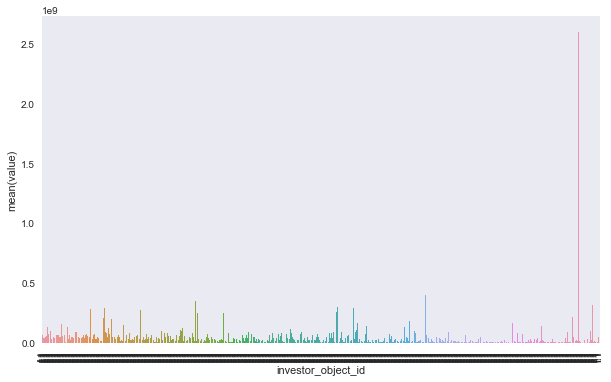

In [42]:
a=sns.barplot(allData_melted.investor_object_id, pd.to_numeric(allData_melted.value), ci=None);
a.set_xticklabels(allData_melted.investor_object_id, rotation=90);

In [ ]:
# do certain investors invest together

In [ ]:
# do certain investors target different funding totals